# **Business Understanding**
We are working for Lending club a finance company which specialises in lending various types of loans to urban customers. When the company receives a loan  application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s  decision:    

1. If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company  
2. If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the companyny

# **Objective of Case Study**
The company wants to understand the **driving factors** (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. So, that the company can utilise this knowledge for its portfolio and risk assessment & **reduce the Credit Loss** by using EDA techniques.

# Steps of analysis:
### 1. Importing necessary libraries
### 2. Data Loading
### 3. Data Understanding(Using Data Dictionary, Shape, Size, Column Datatype)
### 4. Missing value check
### 5. Handling Missing values
### 6. Data Visualization and Analysis
### 7. Conclusion

#### Loading Libraries and Data

In [353]:
import pandas as pd 
import numpy as np 
import seaborn as sns #data visualization
import matplotlib.pyplot as plt #plotting
# Warnings library will be used to ignore some warnings
import warnings
warnings.filterwarnings('ignore')

In [354]:
#Loading the data and data dictionary 
loan_df = pd.read_csv("C:/Users/Pranakshi/OneDrive/Desktop/ML & Data Science/Lending Club Case study/loan/loan.csv")
loan_dd = pd.read_excel("C:/Users/Pranakshi/OneDrive/Desktop/ML & Data Science/Lending Club Case study/Data_Dictionary.xlsx")

In [355]:
loan_df.head() #Check data is loaded

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


#### Data Understanding

In [357]:
## Number of rows and columns
print('Number of Rows & Columns:',loan_df.shape)
# Basic infomation about the loan dataframe
print(loan_df.info())
# Data types of each column
print(loan_df.dtypes)

Number of Rows & Columns: (39717, 111)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None
id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object


In [358]:
# Finding columns with null values
ln = loan_df.isnull().sum()
print(ln)
# Columns in the dataframe
print(loan_df.columns)

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64
Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)


#### Missing value check & Handling missing values

As we can see columns with having high number of null values to equivalent number of rows in dataframe, lets see columns which are having all null values 39717

In [359]:
ln_list = ln[(ln.values == 39717)].index.tolist()
print(ln_list)

['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_

In [360]:
#lets drop these columns with all null values
loan_df.drop(ln_list, axis=1, inplace = True)
# Shape of the dataframe after removing columns
print(loan_df.shape)

(39717, 57)


In [361]:
# Checking column with large amount of null values(in percentage) and irrelevant columns
print((ln/loan_df.shape[0]*100).round(2).sort_values(ascending=False))

verification_status_joint    100.0
annual_inc_joint             100.0
mo_sin_old_rev_tl_op         100.0
mo_sin_old_il_acct           100.0
bc_util                      100.0
                             ...  
delinq_amnt                    0.0
policy_code                    0.0
earliest_cr_line               0.0
delinq_2yrs                    0.0
id                             0.0
Length: 111, dtype: float64


In [362]:
# Removing column with 50% or more null values as it will reduce the impact on analysis
loan_df = loan_df.loc[:,ln/loan_df.shape[0]*100<50]
# Shape of the dataframe after removing columns
print(loan_df.shape)

(39717, 54)


#### Let us see if there are any columns with unique or single values in them.

In [363]:
col_unique = loan_df.nunique()
print(col_unique)

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
desc                          26526
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths              

#### We can drop those columns with single value as they will be no use for our analysis.

In [364]:
c = col_unique[col_unique.values == 1].index.tolist()
print(c)

['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens']


In [365]:
#Dropping these nine columns from dataframe
loan_df.drop(c, axis = 1, inplace=True)
print(loan_df.shape)

(39717, 45)


In [366]:
#Analysis the remaining columns
loan_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

In [367]:
#"desc" has description (text data) which we cannot do anythhing about for now. So removing the column.
# Removing member_id,id,url as it unique LC assigned Id for the borrower member, will not help in analysis.
# Removing zip_code as it is a masked data and cannot be used as input for the analysis
# Removing emp_title as its having random values will not help in analysis.
loan_df.drop(['id','member_id','desc','url','zip_code','emp_title'],axis=1, inplace =True)
loan_df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'title', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

In [368]:
loan_df.shape

(39717, 39)

In [369]:
#"funded_amnt" is not needed because we only need info as to how much is funded in actual. As we have "funded_amnt_inv" , we can remove the earlier column.
#out_prncp, total_pymnt is not needed as we are only including the inv columns for them.
#recoveries, collection_recovery_fee will not be helping in default loan analysis.
loan_df.drop(['funded_amnt','out_prncp','total_pymnt','recoveries','collection_recovery_fee'],axis=1, inplace =True)
loan_df.columns

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp_inv', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')

In [330]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            39717 non-null  int64  
 1   funded_amnt_inv      39717 non-null  float64
 2   term                 39717 non-null  object 
 3   int_rate             39717 non-null  object 
 4   installment          39717 non-null  float64
 5   grade                39717 non-null  object 
 6   sub_grade            39717 non-null  object 
 7   emp_length           38642 non-null  object 
 8   home_ownership       39717 non-null  object 
 9   annual_inc           39717 non-null  float64
 10  verification_status  39717 non-null  object 
 11  issue_d              39717 non-null  object 
 12  loan_status          39717 non-null  object 
 13  purpose              39717 non-null  object 
 14  title                39706 non-null  object 
 15  addr_state           39717 non-null 

#### Data preparation

In [370]:
loan_df['term'].value_counts()

term
 36 months    29096
 60 months    10621
Name: count, dtype: int64

In [371]:
#Let's remove months from term & convert to int type
loan_df['term'] = loan_df['term'].str.replace('months', '')
loan_df['term'] = loan_df['term'].astype(int)

In [372]:
#Let's remove % from interest rate column
loan_df['int_rate'] = loan_df['int_rate'].apply(lambda x: pd.to_numeric(x.split("%")[0]))
loan_df['int_rate'].describe()

count    39717.000000
mean        12.021177
std          3.724825
min          5.420000
25%          9.250000
50%         11.860000
75%         14.590000
max         24.590000
Name: int_rate, dtype: float64

In [373]:
loan_df['grade'].value_counts()
loan_df['grade']=loan_df['grade'].astype('category')

In [374]:
loan_df['sub_grade'].value_counts()
loan_df['sub_grade']=loan_df['sub_grade'].astype('category')

In [336]:
loan_df['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [375]:
print("Mode : " + loan_df.emp_length.mode()[0])
loan_df.emp_length.value_counts()

Mode : 10+ years


emp_length
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: count, dtype: int64

In [379]:
#replacing null value in emp length with mode value i.e. 10+ years
loan_df['emp_length'].fillna(loan_df['emp_length'].mode()[0], inplace = True)
loan_df['emp_length'].isna().sum()


0

In [380]:
#replacing null value in emp length with mode value i.e. 10+ years
loan_df['emp_length'].fillna(loan_df['emp_length'].mode()[0], inplace = True)
loan_df['emp_length'].isna().sum()
#"emp_length" --> { (< 1 year) is assumed as 0 and 10+ years is assumed as 10 }
loan_df['emp_length'] = pd.to_numeric(loan_df['emp_length'].apply(lambda x: 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])))

TypeError: argument of type 'int' is not iterable

In [381]:
loan_df['emp_length'].value_counts()

emp_length
10    9954
0     4583
2     4388
3     4095
4     3436
5     3282
1     3240
6     2229
7     1773
8     1479
9     1258
Name: count, dtype: int64

In [382]:
loan_df['home_ownership'].value_counts()
loan_df['home_ownership']=loan_df['home_ownership'].astype('category')

In [383]:
loan_df['verification_status'].value_counts()
loan_df['verification_status']=loan_df['verification_status'].astype('category')

In [384]:
#Get year & month from issue d & drop it after it
loan_df['issue_d']=pd.to_datetime(loan_df['issue_d'],format='%b-%y')
loan_df['issue_year']=pd.to_datetime(loan_df['issue_d'],format='%b-%y').dt.year
loan_df['issue_month']=pd.to_datetime(loan_df['issue_d'],format='%b-%y').dt.month
loan_df.drop(columns=['issue_d'], inplace=True)

In [385]:
loan_df['purpose'].value_counts()
loan_df['purpose']=loan_df['purpose'].astype('category')
loan_df['addr_state']=loan_df['addr_state'].astype('category')

In [386]:
loan_df['title'].value_counts()

title
Debt Consolidation                  2184
Debt Consolidation Loan             1729
Personal Loan                        659
Consolidation                        517
debt consolidation                   505
                                    ... 
your rate is better than my rate       1
Concession Trailer                     1
gregs                                  1
EZover                                 1
JAL Loan                               1
Name: count, Length: 19615, dtype: int64

In [387]:
#since title column has too many unique values,let us drop this column as it may not be useful to keep it
loan_df.drop(columns=['title'], inplace=True)

In [388]:
#let us convert these values in float by removing %
loan_df['revol_util'] = pd.Series(loan_df['revol_util']).str.replace('%', '').astype(float)
loan_df['revol_util'].describe()

count    39667.000000
mean        48.832152
std         28.332634
min          0.000000
25%         25.400000
50%         49.300000
75%         72.400000
max         99.900000
Name: revol_util, dtype: float64

In [389]:
#let us convert these values in float by removing %
med = loan_df['revol_util'].median()
print(med)


49.3


In [390]:
#replacing null values with median
loan_df['revol_util'] = loan_df['revol_util'].fillna(med)
loan_df['revol_util'].isnull().sum()

0

In [391]:
#loan_df['earliest_cr_line'].value_counts()
#lets derive days difference from current year from this column as more length of credit history low risk of being defaulter
from datetime import datetime
today = datetime.today()
today.year
def days_from_earliest_cr_line (d):
    m, y = d.split('-')
    if y in ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']:
        y, m = d.split('-')
    y = 2000 + int(y)
    if y > today.year:
        y -= 100
    earliest_cr_line = datetime.strptime(str(y)+'-'+m+'-1', '%Y-%b-%d')
    return (today - earliest_cr_line).days
loan_df['days_earliest_cr_line'] = loan_df['earliest_cr_line'].apply(days_from_earliest_cr_line)
loan_df['days_earliest_cr_line'].describe()

count    39717.000000
mean     10071.093663
std       2495.982605
min       5767.000000
25%       8385.000000
50%       9604.000000
75%      11246.000000
max      28717.000000
Name: days_earliest_cr_line, dtype: float64

In [392]:
loan_df.drop(columns=['earliest_cr_line'], inplace=True)

In [393]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   loan_amnt              39717 non-null  int64   
 1   funded_amnt_inv        39717 non-null  float64 
 2   term                   39717 non-null  int32   
 3   int_rate               39717 non-null  float64 
 4   installment            39717 non-null  float64 
 5   grade                  39717 non-null  category
 6   sub_grade              39717 non-null  category
 7   emp_length             39717 non-null  int64   
 8   home_ownership         39717 non-null  category
 9   annual_inc             39717 non-null  float64 
 10  verification_status    39717 non-null  category
 11  loan_status            39717 non-null  object  
 12  purpose                39717 non-null  category
 13  addr_state             39717 non-null  category
 14  dti                    39717 non-null 

In [394]:
# Divding the column as per categorical and numerical
cat_cols = ['term','grade','sub_grade','emp_length','home_ownership','verification_status','purpose','addr_state']
cont_cols=['loan_amnt','funded_amt_inv','int_rate','installment','annual_inc','dti','delinq_2yrs','inq_last_6mths','open_acc','pub_rec','revol_bal',
           'revol_util','total_acc','out_prncp_inv','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','last_pymnt_amnt',
           'issue_year','issue_month','days_earliest_cr_line']
result_cols = ['loan_status']

#### Removing the outliers

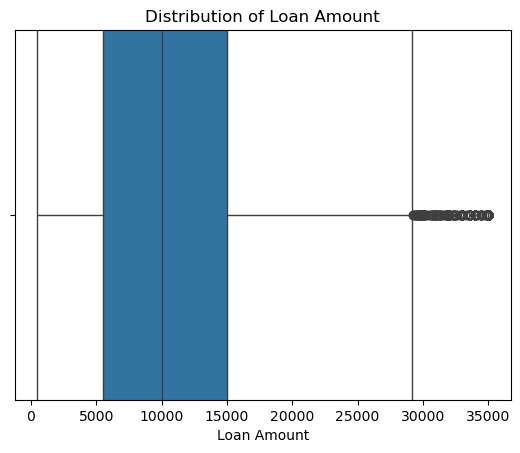

In [395]:
# Checking outlier values in continuous columns via box plot
#loan Amount
sns.boxplot(x=loan_df['loan_amnt'],width=750)
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.show()
## Upper fence turns out to be around 30000 whereas max is 35000 which is not much more then upper fence thus will not have much impact on the analysis.

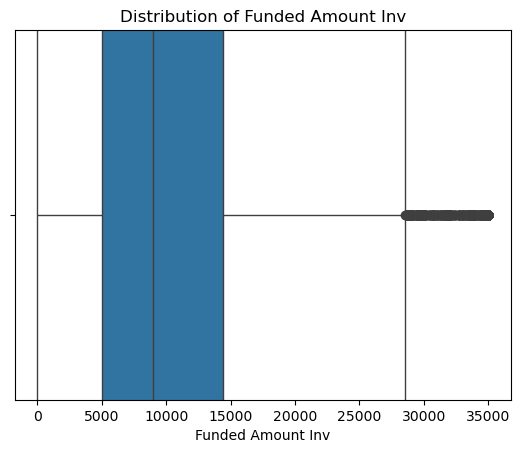

In [396]:
# Checking outlier values in continuous columns via box plot
#funded amt inv
sns.boxplot(x=loan_df['funded_amnt_inv'],width=750)
plt.title('Distribution of Funded Amount Inv')
plt.xlabel('Funded Amount Inv')
plt.show()
## Upper fence turns out to be around 28000 whereas max is 35000 which is not much more then upper fence thus will not have much impact on the analysis.

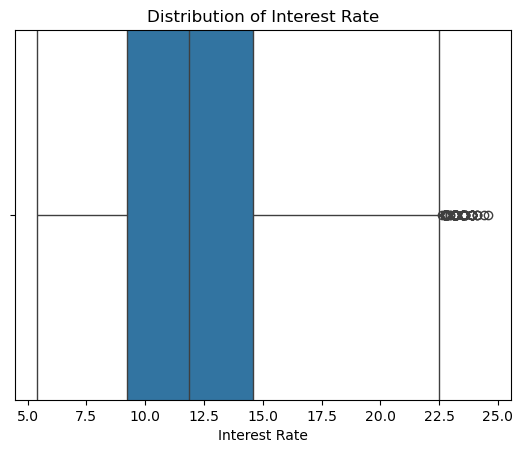

In [397]:
# Checking outlier values in continuous columns via box plot
#int rate
sns.boxplot(x=loan_df['int_rate'],width=750)
plt.title('Distribution of Interest Rate')
plt.xlabel('Interest Rate')
plt.show()
## Upper fence turns out to be 22.5 whereas max is 24.5 which is not much more then upper fence thus will not have much impact on the analysis.

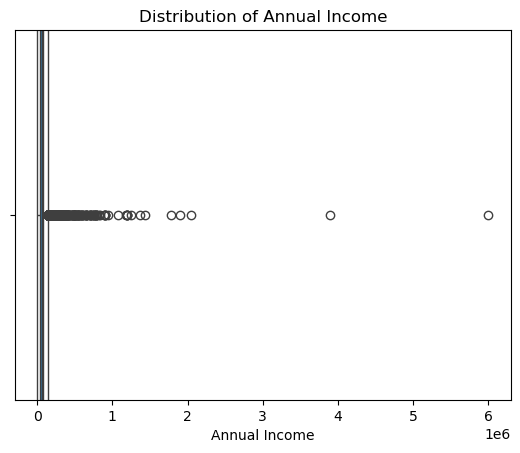

In [399]:
#annual_inc
sns.boxplot(x=loan_df['annual_inc'],width=750)
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income')
plt.show()
# We need to remove outliers as there is vast difference between the upper fence & the outliers.

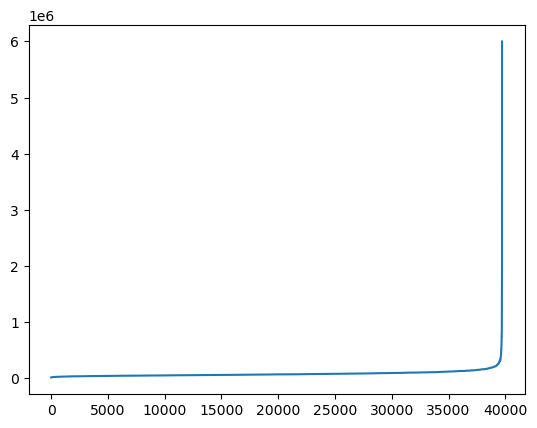

In [400]:
# checking trend of values in annual_inc using line chart to find the appropriate quantile to use to remove outliers
s = sorted(loan_df['annual_inc'])
plt.plot(s)
plt.show()
#As it can be observed from the line chart, the annual_inc is increasing in expontntial format around 99th percentile,Thus we can remove values greater than 99th percentile.

In [401]:
## Removing outliers in annual_inc greater than 99th percentile
loan_df = loan_df[loan_df['annual_inc']<=np.percentile(loan_df['annual_inc'],99)]

In [402]:
loan_df.shape

(39319, 34)

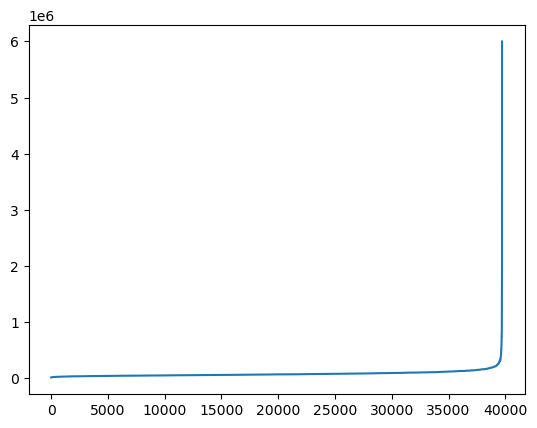

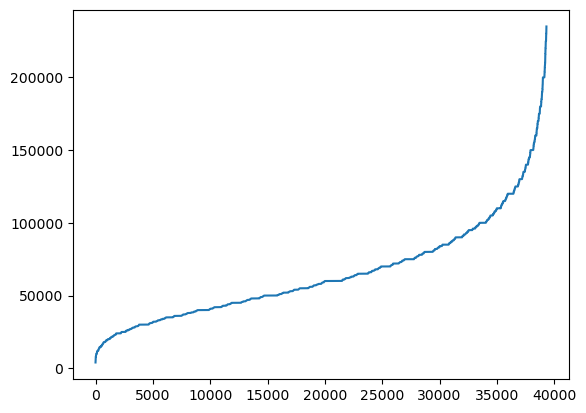

In [403]:
#Graph after removing the ouliers
plt.plot(sorted(loan_df['annual_inc']))
plt.show()

#### The data is cleaned and outliers removed, we can move start with the analysis.

### Univariate Analysis

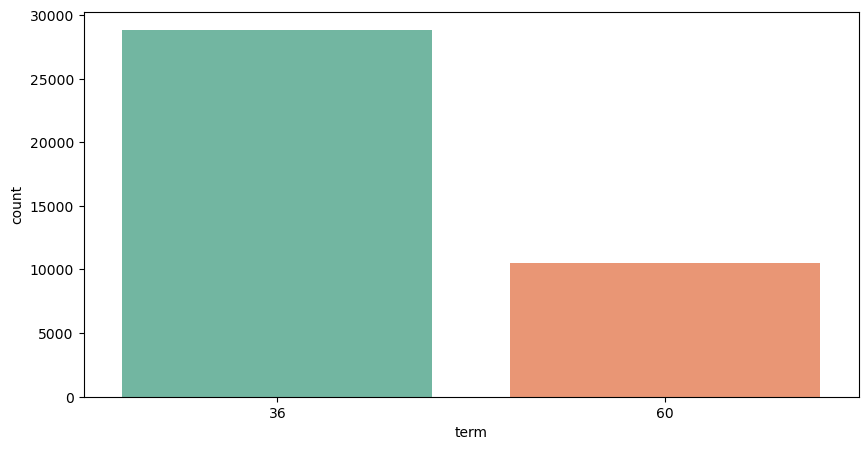

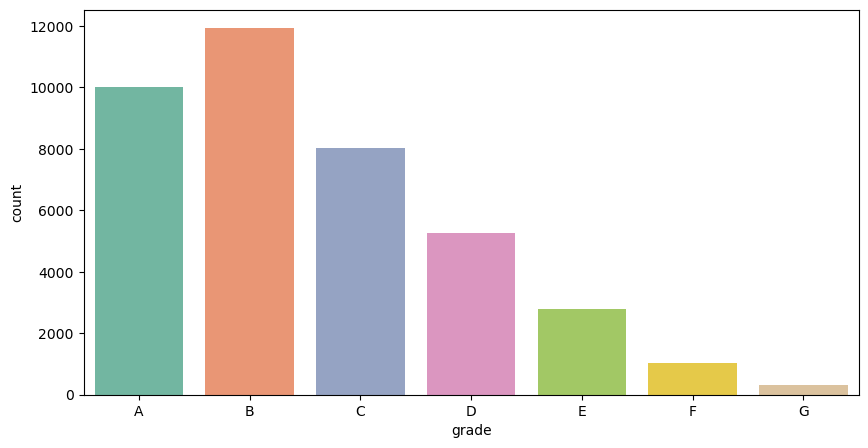

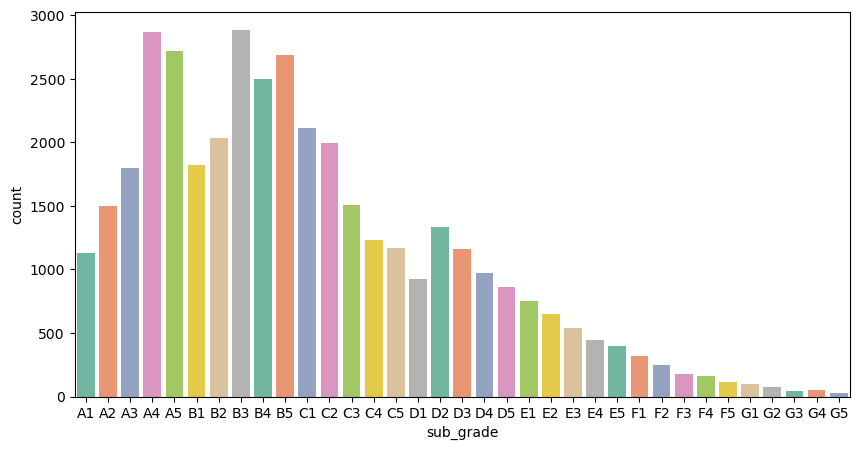

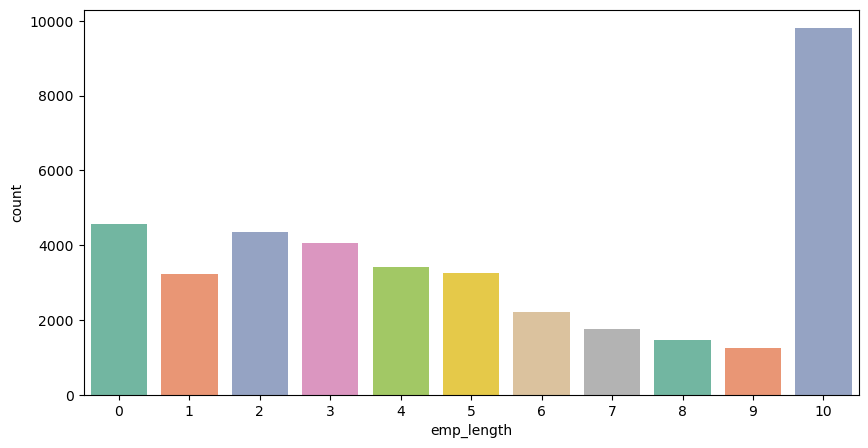

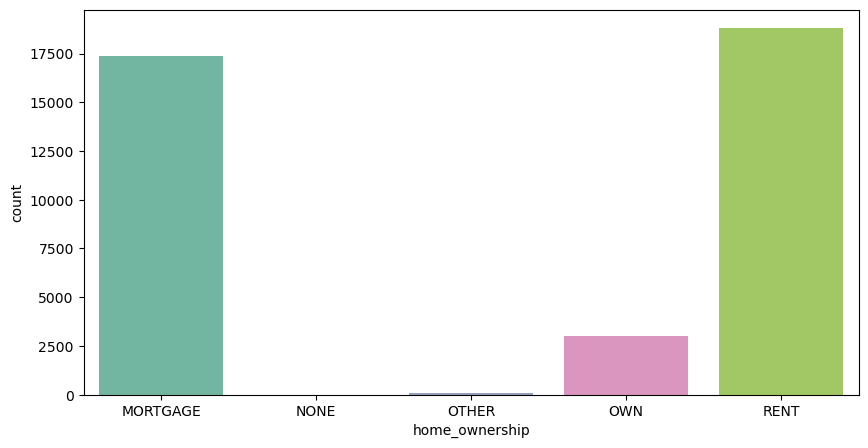

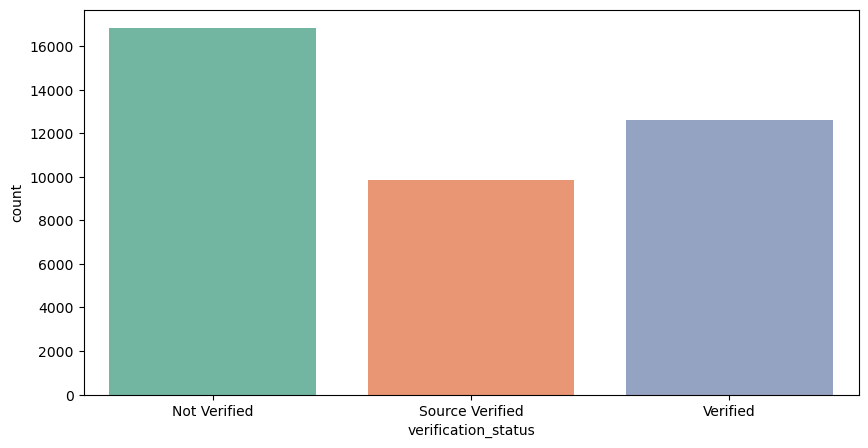

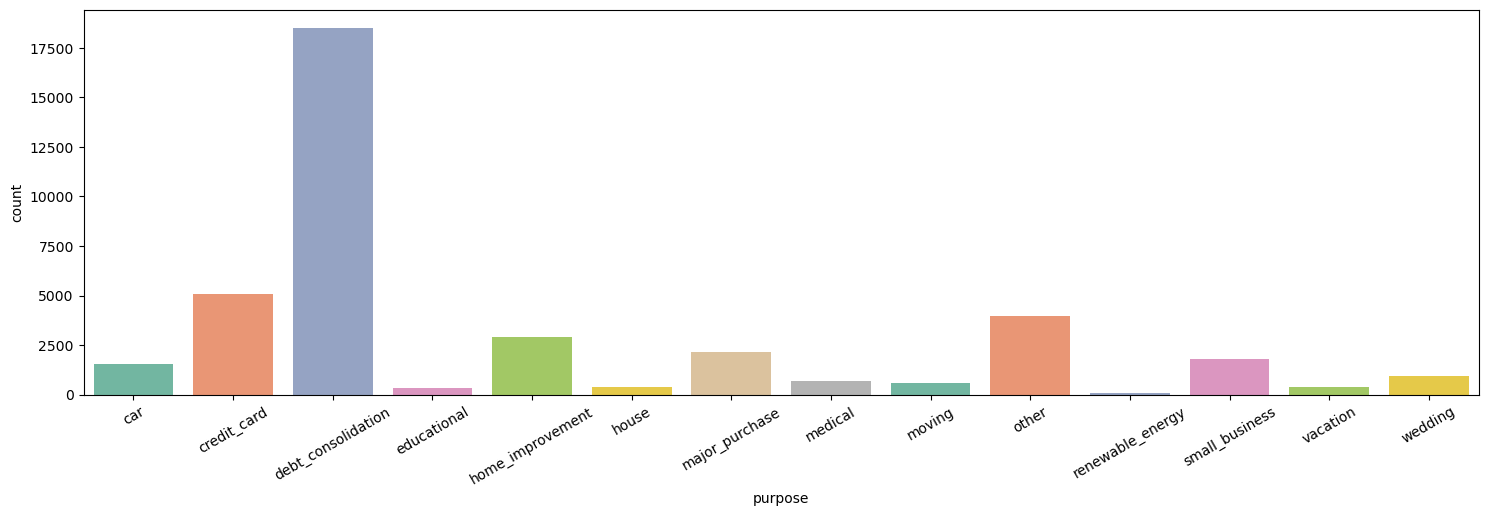

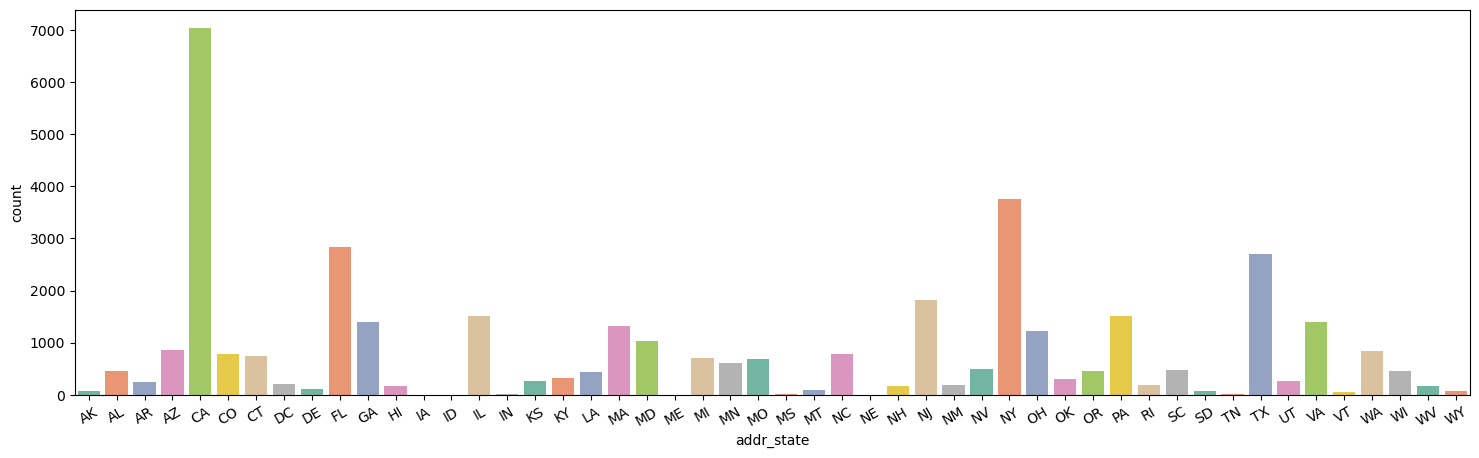

In [420]:
#Lets use countplot for analysis of categorical column
for col in cat_cols:
    if (col == 'purpose' or col == 'addr_state'):
         plt.figure(figsize=(18,5))
         plt.xticks(rotation=30)
    else:
         plt.figure(figsize=(10,5))
    sns.countplot(x=loan_df[col], palette= "Set2")
    plt.show()

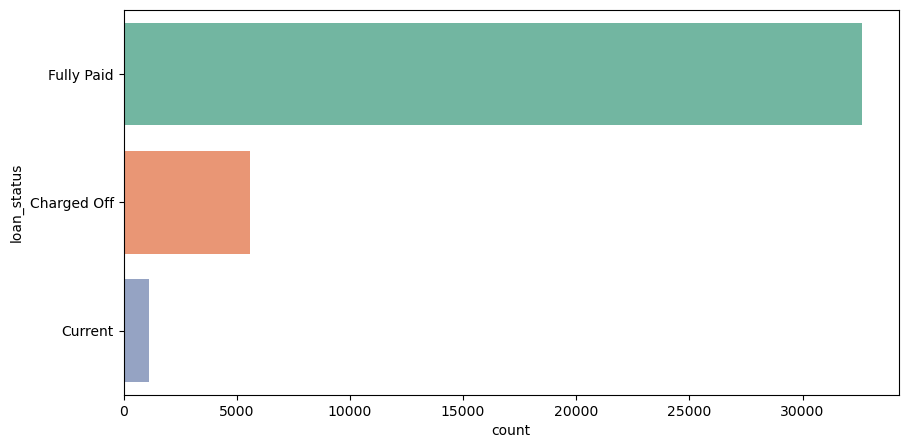

In [421]:
# Loan status 
plt.figure(figsize=(10,5))
sns.countplot(loan_df['loan_status'], palette = "Set2")
plt.show()

#### Inference from univariate categorical columns 
1.  Term Column - More than half of the loan taken has term of 36 months compared to 60 months.
2.  Grade: A large amount of loans are with grade 'A' and 'B' compared to rest showing most loans are high-grade loans.
3.  Sub Grade: A large amount of loans are with lower subgrade in grade 'A' and 'B' compared to rest showing most loans are high grade loans.
4.  Emp Length: The borrowers have working experience greater than 10 years are in majority
5.  Home Ownereship : Most of the borrowsers don't have their own property and they are on mortage or rent
6.  Loan Status: 50% of the borrowers are verified by the company or have source verified & 50% are not verified
7.  Purpose: A large percentage of loans are taken for debt consolidation followed by credit card & others etc.
8.  Address State: Majority of the borrowers are from the cities like california, new york, texas, florida etc.
9.  loan status : Mostly loans are fully paid, compared to defaulters & current.

#### Univariate Analysis of Numerical Columnn

In [415]:
#creating bins for int_rate,open_acc,revol_util,total_acc
loan_df['int_rate_groups'] = pd.cut(loan_df['int_rate'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])
loan_df['open_acc_groups'] = pd.cut(loan_df['open_acc'],bins = 5,precision =0,labels=['2-10','10-19','19-27','27-36','36-44'])
loan_df['revol_util_groups'] = pd.cut(loan_df['revol_util'], bins=5,precision =0,labels=['0-20','20-40','40-60','60-80','80-100'])
loan_df['total_acc_groups'] = pd.cut(loan_df['total_acc'], bins=5,precision =0,labels=['2-20','20-37','37-55','55-74','74-90'])
loan_df['annual_inc_groups'] = pd.cut(loan_df['annual_inc'], bins=5,precision =0,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])

Text(0.5, 0, 'Revol Util Groups')

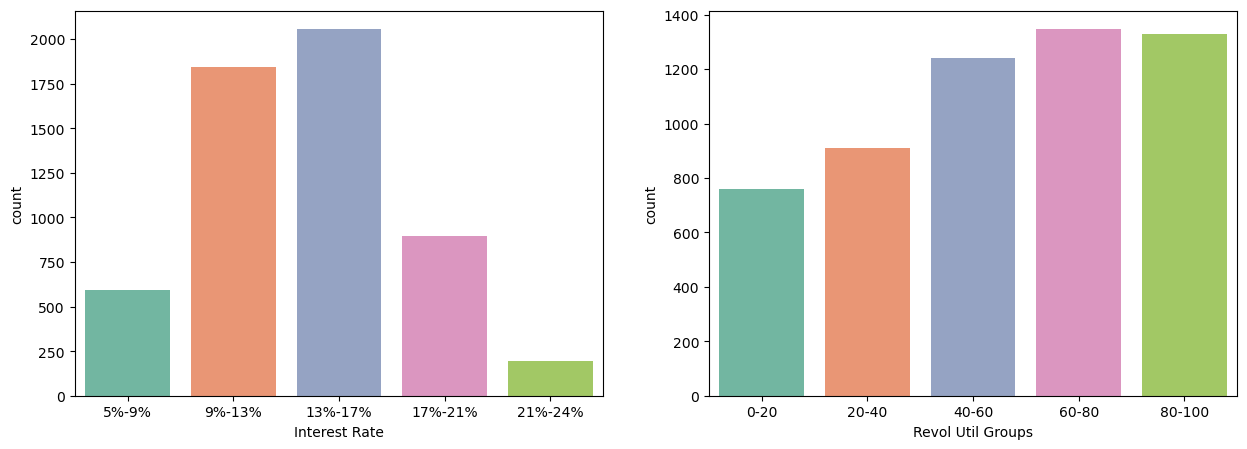

In [427]:
fig, ax = plt.subplots(1,2,figsize = (15,5))
plt.subplot(121)
sns.countplot(x='int_rate_groups', data=loan_df[loan_df['loan_status'] == 'Charged Off'], palette = "Set2")
plt.xlabel('Interest Rate')
plt.subplot(122)
sns.countplot(x='revol_util_groups', data=loan_df[loan_df['loan_status'] == 'Charged Off'], palette = "Set2")
plt.xlabel('Revol Util Groups')

<Axes: xlabel='Public Record Bankruptcies', ylabel='count'>

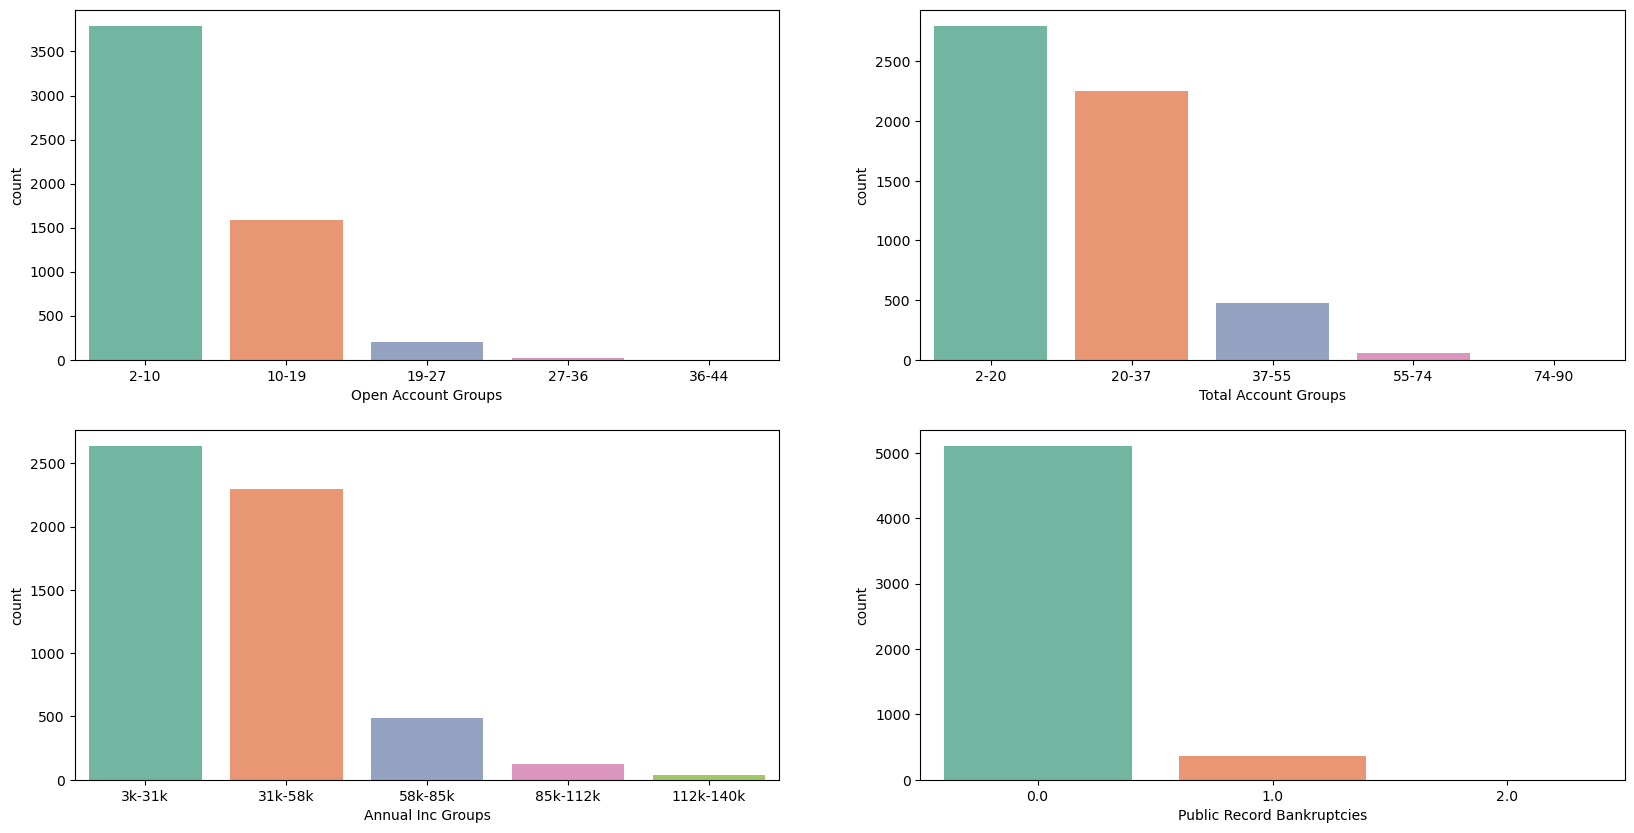

In [438]:
fig, ax = plt.subplots(2,2,figsize = (20,10))
plt.subplot(221)
sns.countplot(x='open_acc_groups', data=loan_df[loan_df['loan_status'] == 'Charged Off'], palette = "Set2")
plt.xlabel('Open Account Groups')
plt.subplot(222)
sns.countplot(x='total_acc_groups', data=loan_df[loan_df['loan_status'] == 'Charged Off'], palette = "Set2")
plt.xlabel('Total Account Groups')
plt.subplot(223)
sns.countplot(x='annual_inc_groups', data=loan_df[loan_df['loan_status'] == 'Charged Off'], palette = "Set2")
plt.xlabel('Annual Inc Groups')
plt.subplot(224)
plt.xlabel('Public Record Bankruptcies')
sns.countplot(x='pub_rec_bankruptcies', data=loan_df[loan_df['loan_status'] == 'Charged Off'], palette = "Set2")

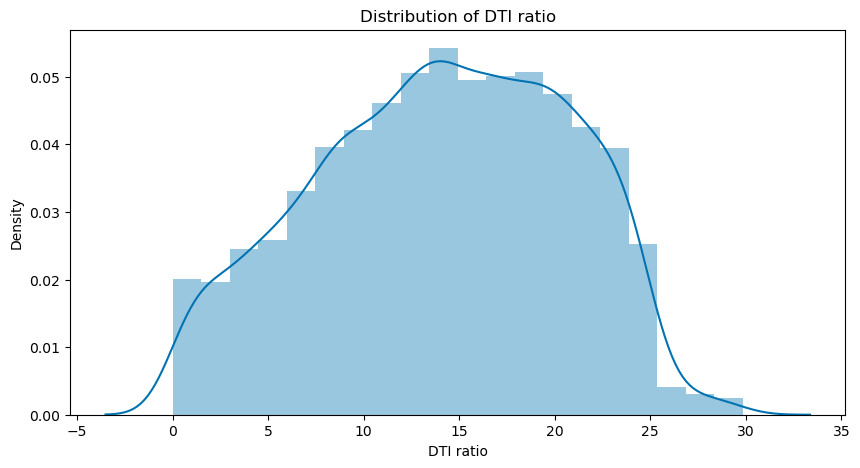

In [440]:
# Distribution of dti
plt.figure(figsize=(10,5))
filtered_data = loan_df[loan_df['loan_status'] == 'Charged Off']
sns.distplot(filtered_data['dti'],kde=True,bins=20)
plt.xlabel('DTI ratio')
plt.ylabel('Density')
plt.title('Distribution of DTI ratio',fontsize=12)
plt.show()

Text(0.5, 0, 'Issue Year')

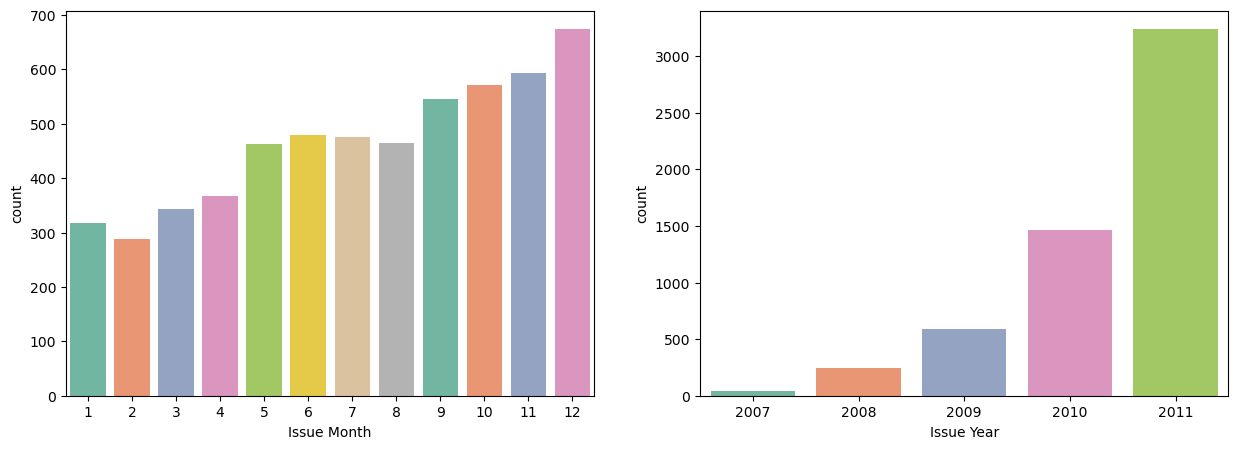

In [443]:
fig, ax = plt.subplots(1,2,figsize = (15,5))
plt.subplot(121)
sns.countplot(x='issue_month',palette = 'Set2', data=loan_df[loan_df['loan_status'] == 'Charged Off'],)
plt.xlabel('Issue Month')
plt.subplot(122)
sns.countplot(x='issue_year',palette = 'Set2', data=loan_df[loan_df['loan_status'] == 'Charged Off'],)
plt.xlabel('Issue Year')

#### Inference from univariate numerical columns for charged off /Defaulters loan in below scenorio:
1.  Interest rate - Most of the loans are on interest rate of Range (9-17%)
2.  Revol Util: We can see a high Util Rate in range of 40-100, which is often associated with higher likelohood of default.
3.  Open Account: Most of the defaulters have open/active accounts in bank more than 2 to 10.
4.  Total Account: Most of the defaulters have total accounts in bank more than 2 to 20.
5.  Annual Income : Most of the defaulters have annual income in range of 3k to 31k.
6.  Pub Rec Bankrupties : Most of the defaulters has indicated zero bankrupties
7.  Dti: Majority of the defaulters have very large debt compared to the income registerd, concentrated in the 10-15 DTI ratio.
8.  Issue Date: Majority of the loans are given in last quarter of the year & the number of loans approved increases with the time at expontential rate
, thus we can say that the loan approval rate is increasing with the time.

#### Segmented Univariate Analysis 

<Axes: xlabel='int_rate_groups', ylabel='annual_inc'>

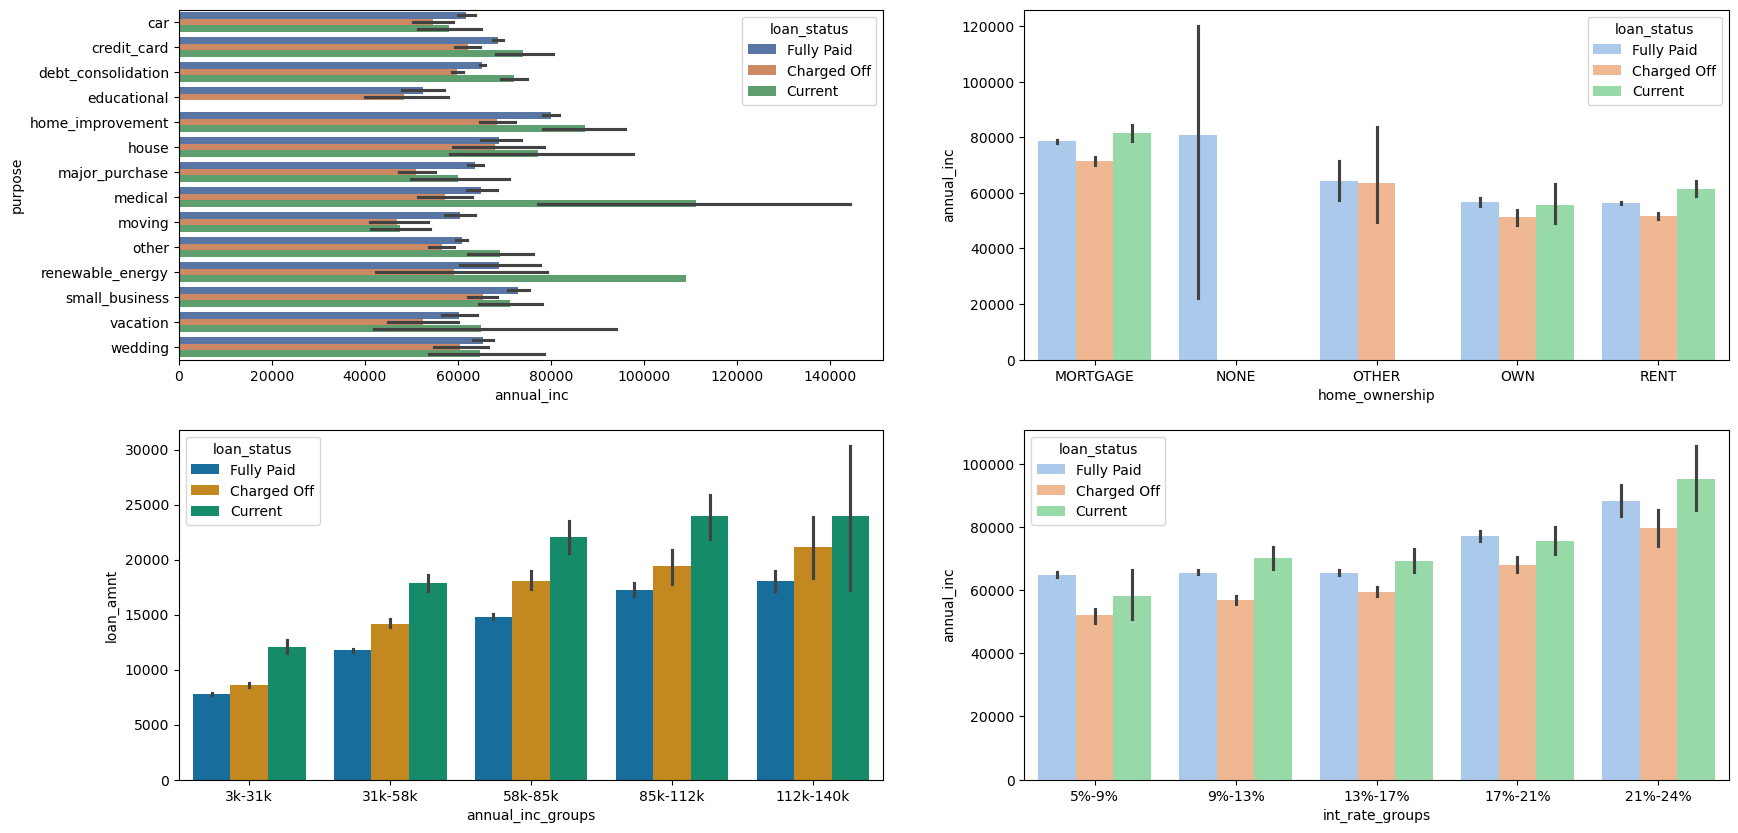

In [449]:
fig, ax = plt.subplots(2,2,figsize = (20,10))
plt.subplot(221)
#Annual income vs purpose
sns.barplot(data =loan_df,x='annual_inc', y='purpose', hue ='loan_status',palette="pastel")
plt.subplot(222)
#Annual income vs home ownership
sns.barplot(data =loan_df,x='home_ownership', y='annual_inc', hue ='loan_status',palette="pastel")
plt.subplot(223)
#Annual income vs loan amount
sns.barplot( data = loan_df,x = "annual_inc_groups", y = "loan_amnt", hue = 'loan_status',palette="pastel")
plt.subplot(224)
#Annual income vs interest rate
sns.barplot(data =loan_df,x='int_rate_groups', y='annual_inc', hue ='loan_status',palette="pastel")

<Axes: xlabel='loan_amnt', ylabel='grade'>

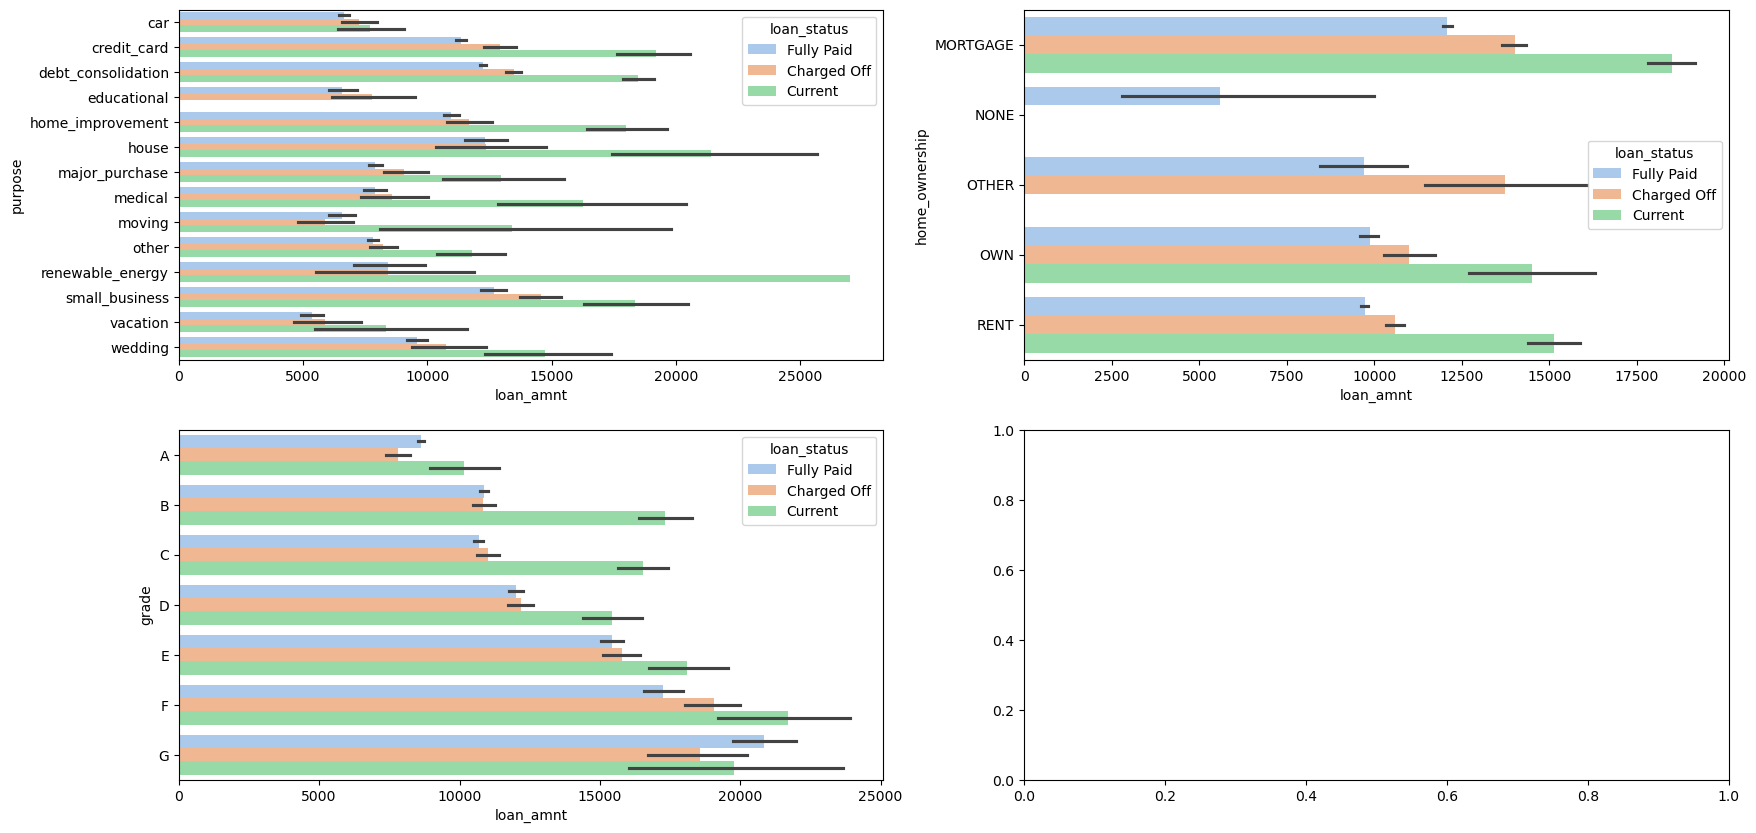

In [469]:
fig, ax = plt.subplots(2,2,figsize = (20,10))
plt.subplot(221)
#Loan amount vs Loan purpose
sns.barplot(data =loan_df,x='loan_amnt', y='purpose', hue ='loan_status',palette="pastel")
plt.subplot(222)
#loan amount Vs Home ownership
sns.barplot(data =loan_df,x='loan_amnt', y='home_ownership', hue ='loan_status',palette="pastel")
plt.subplot(223)
#Loan Amount vs grade
sns.barplot(data =loan_df,x='loan_amnt', y='grade', hue ='loan_status',palette="pastel")

#### Inference from segmented analysis
1.  The number of loans applied and defaulted are the highest in number for "debt_consolation", "home_improvment","credit card" & "Small busines" although the annual income of those borrowers are not high in range of 60-70k
2.  Applicants with higher salary mostly applied loans for "Medical","home_improvment", "house", "renewable_energy" and "small_businesses"
3.  The number of loans applied & defaulter are by borrowers who are living in mortgage & their annual income in range of 60-70k
4.  Across all the income groups, the loan_amount is higher for people who defaulted than fully paid.
5.  Higher annual income defaulters are paying interest in range of 21-24%
6.  As interest rate is increasing, defaulters are also increasing.
7.  More loan amount by defaulters are taken for "debt_consolation", "home_improvment","credit card" & "Small busines"
8.  More loan amount by defaulters are taken by borrowers who are living in mortgage.
9.  More loan amount is taken by Grade F & defaulters are also high in Grade F.


#### Bivariate Analysis

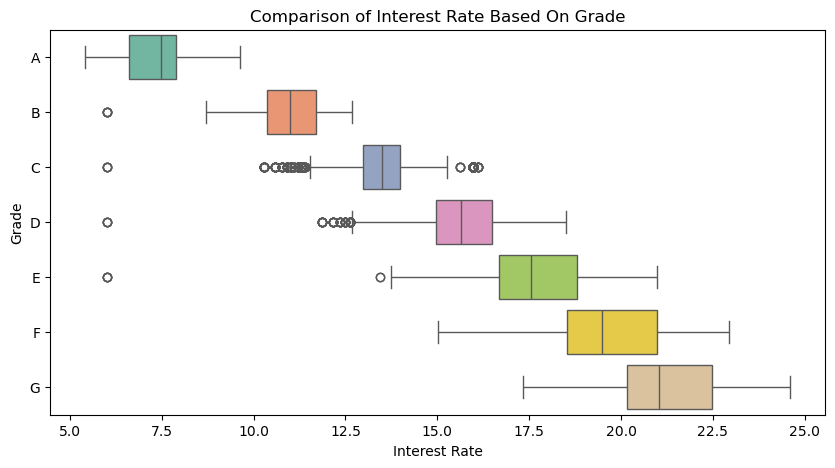

In [487]:
# Comparsion of Numerical Vs Categorical 
#Comparison of interest rate based on grade
plt.figure(figsize=(10,5))
sns.boxplot(data=loan_df,x='int_rate',y='grade', palette = 'Set2')
plt.xlabel('Interest Rate')
plt.ylabel('Grade')
plt.title('Comparison of Interest Rate Based On Grade',fontsize=12)
plt.show()

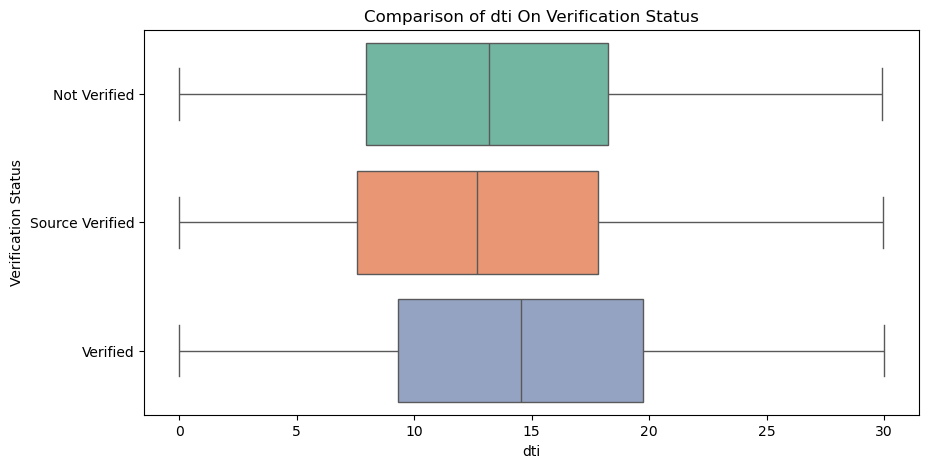

In [489]:
#Comparison of dti based on verification status
plt.figure(figsize=(10,5))
sns.boxplot(data=loan_df,x='dti',y='verification_status', palette = 'Set2')
plt.xlabel('dti')
plt.ylabel('Verification Status')
plt.title('Comparison of dti On Verification Status',fontsize=12)
plt.show()

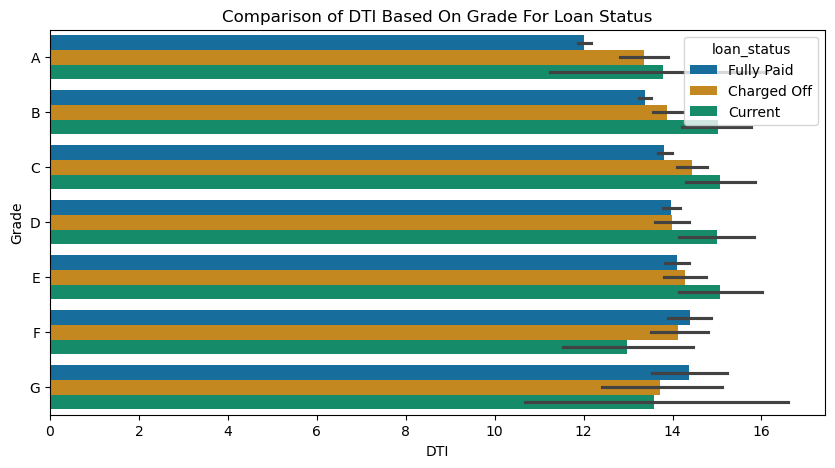

In [491]:
# Comparison of DTI over grade for loan status
plt.figure(figsize=(10,5))
sns.barplot(data=loan_df,x='dti',y='grade',hue='loan_status')
plt.xlabel('DTI')
plt.ylabel('Grade')
plt.title('Comparison of DTI Based On Grade For Loan Status')
plt.show()

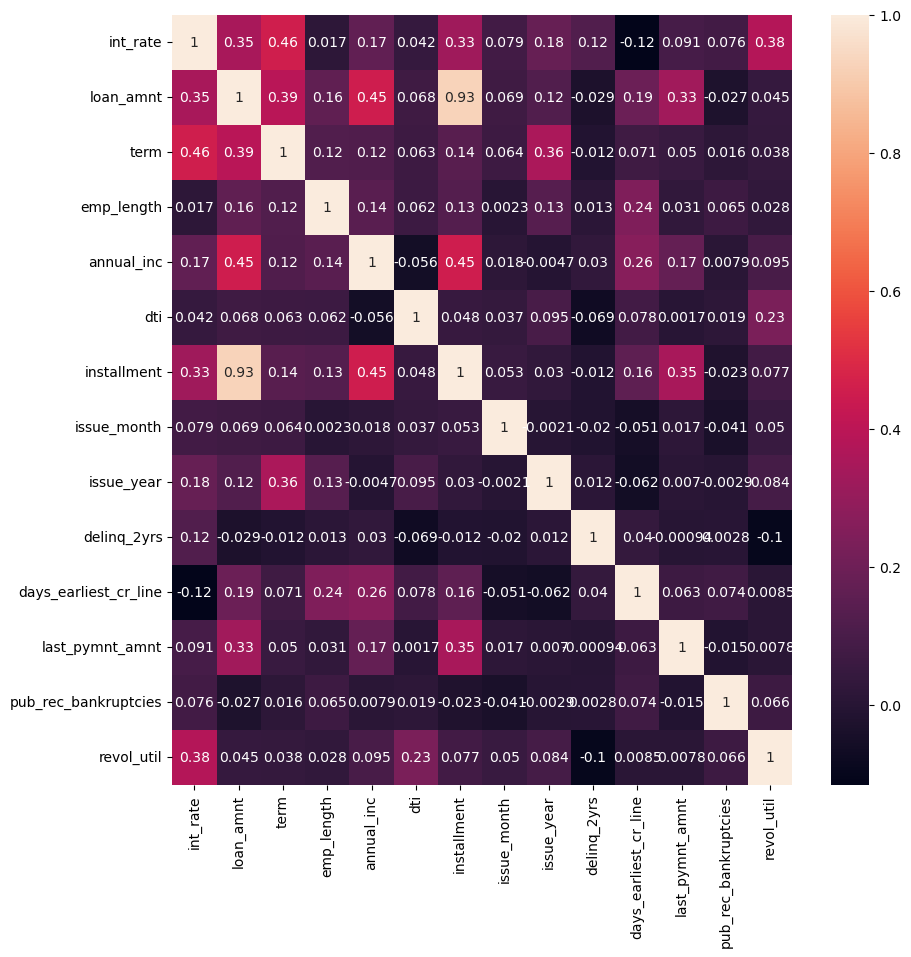

In [507]:
# Heatmap of correlation between numeric variables for charged off loans
#filtered_data = loan_df[loan_df['loan_status'] == 'Charged Off']
col = ['int_rate','loan_amnt','term','emp_length','annual_inc','dti','installment','issue_month','issue_year','delinq_2yrs','days_earliest_cr_line'
       ,'last_pymnt_amnt','pub_rec_bankruptcies','revol_util']
sel_df = filtered_data[col]
sel_df['loan_amnt'] = sel_df['loan_amnt'].astype(float)
#sel_df.info()
plt.figure(figsize=(10,10))
sns.heatmap(sel_df.corr(),annot=True)
plt.show()

#### Bivariate Analysis for defaulters
1.  The Grade represent risk factor, so lower the grade more is interst rate.
2.  The Grade A which is lowest risk also has lowest DTI ratio which we can say that higher grade has lower rate of default.
3.  The brrowers are mostly having no record of Public Recorded Bankruptcy and are safe choice for loan issue.
4.  The interest rate is highly correlated with terms,High installment and longer repayment term
5.  The loan amount is highly correlated with installemnt, as loan amount increases installment also increases.
6.  Higher annual income borrowers have high revol util, more chances of defaulting the loan.